### 一：实验目的和要求
#### 1．掌握文本数据挖掘的基本方法。
### 二：内容和方法
近年来，随着微信、微博、市长信箱、阳光热线等网络问政平台逐步成为政府了解民意、汇聚民智、凝聚民气的重要渠道，各类社情民意相关的文本数据量不断攀升，给以往主要依靠人工来进行留言划分的相关部门的工作带来了极大挑战。
在处理网络问政平台的群众留言时，工作人员首先按照一定的划分体系（参考附件1 提供的内容分类三级标签体系）对留言进行分类，以便后续将群众留言分派至相应的职能部门处理。目前，大部分电子政务系统还是依靠人工根据经验处理，存在工作量大、效率低，且差错率高等问题。请根据附件2 给出的数据，建立关于留言内容的一级标签分类模型。通常使用 F-Score 对分类方法进行评价：
<br>
其中为第类的查准率，为第类的查全率

In [4]:
# 读取数据
import pandas as pd
data = pd.read_excel('D:/root/Desktop/各科/kk/实验7+群众留言分类2.xlsx')
data = data[['留言详情','一级标签']]
data.columns = ['message','label']
data

,message,label
0,\n\t\t\t\t\t\n\t\t\t\t\tA3区大道西行便道，未管所路口至加油站路段，...,城乡建设
1,\n\t\t\t\t\t\n\t\t\t\t\t位于书院路主干道的在水一方大厦一楼至四楼人为...,城乡建设
2,\n\t\t\t\t\t\n\t\t\t\t\t尊敬的领导：A1区苑小区位于A1区火炬路，小...,城乡建设
3,\n\t\t\t\t\t\n\t\t\t\t\tA1区A2区华庭小区高层为二次供水，楼顶水箱...,城乡建设
4,\n\t\t\t\t\t\n\t\t\t\t\tA1区A2区华庭小区高层为二次供水，楼顶水箱...,城乡建设
...,...,...
9205,\n \n 我们夫妻都是农村户口，大的是女9岁，小的是儿2岁半，才15斤...,卫生计生
9206,\n \n 本人2015年2月16号在B市中心医院做无痛人流手术，手术后...,卫生计生
9207,\n \n 我们是再婚，很想再要一个小孩，不知我省二胎新政策何时出，如果...,卫生计生
9208,\n \n K8县惊现奇葩证明！ 我是西地省K8县人，想生二孩。被告知要...,卫生计生


In [20]:
# 对垃圾短信和正常短信各1000条进行抽样
a = data[data['label']=='城乡建设'].sample(600)
b = data[data['label']=='劳动和社会保障'].sample(600)
c = data[data['label']=='教育文体'].sample(600)
d = data[data['label']=='商贸旅游'].sample(600)
e = data[data['label']=='卫生计生'].sample(600)
f = data[data['label']=='教育文体'].sample(600)
g = data[data['label']=='交通运输'].sample(600)

data_new = pd.concat([a,b],axis=0)
data_new

,message,label
836,\n\t\t\t\t\t\n\t\t\t\t\t 你好，我有一个很重要的问题，关于J6县的...,城乡建设
1486,\n\t\t\t\t\t\n\t\t\t\t\t 欣见M3县政府正为创建文明县城开展各项有...,城乡建设
894,\n\t\t\t\t\t\n\t\t\t\t\tJ10 县永乐江镇松山村众城中学前面的这一条...,城乡建设
1932,\n\t\t\t\t\t\n\t\t\t\t\tG市临G5县合口镇今天刚放出来的水好多浮沉，...,城乡建设
1162,\n\t\t\t\t\t\n\t\t\t\t\t 今日见县绿化局车辆对县城沿街行道树和绿化...,城乡建设
...,...,...
6283,\n\t\t\t\t\t\n\t\t\t\t\t 我系1994年入伍的城镇退役士兵，在当时...,劳动和社会保障
5502,\n \n 我省2013年退休职工养老金调整政策怎么还没出台啊！其他省里...,劳动和社会保障
6942,\n \n 我们I4县久通锑业有限责任公司原职工五人实名举报：I4县人社局社...,劳动和社会保障
6228,\n \n 尊敬的领导，您好！\n\n 我是很不走运的50后，什么事都赶上...,劳动和社会保障


In [21]:
# 去重操作，对有一摸一样的文本进行去重
data_dup = data_new['message'].drop_duplicates()
data_dup

836     \n\t\t\t\t\t\n\t\t\t\t\t　　你好，我有一个很重要的问题，关于J6县的...
1486    \n\t\t\t\t\t\n\t\t\t\t\t　　欣见M3县政府正为创建文明县城开展各项有...
894     \n\t\t\t\t\t\n\t\t\t\t\tJ10 县永乐江镇松山村众城中学前面的这一条...
1932    \n\t\t\t\t\t\n\t\t\t\t\tG市临G5县合口镇今天刚放出来的水好多浮沉，...
1162    \n\t\t\t\t\t\n\t\t\t\t\t　　今日见县绿化局车辆对县城沿街行道树和绿化...
                              ...                        
6283    \n\t\t\t\t\t\n\t\t\t\t\t　　我系1994年入伍的城镇退役士兵，在当时...
5502    \n     \n     　　我省2013年退休职工养老金调整政策怎么还没出台啊！其他省里...
6942    \n     \n     我们I4县久通锑业有限责任公司原职工五人实名举报：I4县人社局社...
6228    \n     \n     尊敬的领导，您好！\n\n　　我是很不走运的50后，什么事都赶上...
5190    \n     \n     彭厅长：　　你好！　　我是一名集体单位的职工，92年招工，单位在...
Name: message, Length: 1195, dtype: object

In [22]:
#去除\t\n序列(去除敏感字符)
import re
data_qumin = data_dup.apply(lambda x : re.sub('\t','',x)).apply(lambda x : re.sub('\n','',x))
data_qumin

836     　　你好，我有一个很重要的问题，关于J6县的房屋补贴问题，我们J市每一个县政府都有老房拆掉政...
1486    　　欣见M3县政府正为创建文明县城开展各项有意义的活动，一桩尘封多年的夙愿不由浮上心头：在城...
894     J10 县永乐江镇松山村众城中学前面的这一条路上的路灯什么时候可以亮起来？这条路这么破，到处...
1932           G市临G5县合口镇今天刚放出来的水好多浮沉，是怎么回事？不合格的自来水就让村民使用？
1162    　　今日见县绿化局车辆对县城沿街行道树和绿化树木进行喷雾杀虫，特建议绿化局车辆能否可以采取有...
                              ...                        
6283    　　我系1994年入伍的城镇退役士兵，在当时是应有安置卡的，县编办应该也是有编的，2002年...
5502              　　我省2013年退休职工养老金调整政策怎么还没出台啊！其他省里差不多都...
6942              我们I4县久通锑业有限责任公司原职工五人实名举报：I4县人社局社保所违法...
6228              尊敬的领导，您好！　　我是很不走运的50后，什么事都赶上了，我2016年...
5190              彭厅长：　　你好！　　我是一名集体单位的职工，92年招工，单位在09年破...
Name: message, Length: 1195, dtype: object

In [23]:
#分词操作
import jieba
data_cut = data_qumin .apply(lambda x: jieba.lcut(x))#对每个信息进行分词
data_cut

836     [　, 　, 你好, ，, 我, 有, 一个, 很, 重要, 的, 问题, ，, 关于, J...
1486    [　, 　, 欣见, M3, 县政府, 正为, 创建, 文明, 县城, 开展, 各项, 有,...
894     [J10,  , 县, 永乐, 江镇, 松山, 村众, 城, 中学, 前面, 的, 这, 一...
1932    [G, 市临, G5, 县合, 口镇, 今天, 刚放, 出来, 的, 水, 好多, 浮沉, ...
1162    [　, 　, 今日, 见县, 绿化, 局, 车辆, 对, 县城, 沿街, 行道树, 和, 绿...
                              ...                        
6283    [　, 　, 我系, 1994, 年, 入伍, 的, 城镇, 退役, 士兵, ，, 在, 当...
5502    [ ,  ,  ,  ,  ,  ,  ,  ,  ,  , 　, 　, 我省, 2013,...
6942    [ ,  ,  ,  ,  ,  ,  ,  ,  ,  , 我们, I4, 县久, 通锑业...
6228    [ ,  ,  ,  ,  ,  ,  ,  ,  ,  , 尊敬, 的, 领导, ，, 您...
5190    [ ,  ,  ,  ,  ,  ,  ,  ,  ,  , 彭, 厅长, ：, 　, 　,...
Name: message, Length: 1195, dtype: object

In [25]:
# 去除停用词（了，吗，啊，等没意义的词）
stopWords = ['≮', '≯', '≠', '≮', ' ','!','?', '我', '你', '在', '–','叫','是','胡','的']


data_after_stop = data_cut.apply(lambda x: [i for i in x if i not in stopWords])#对里面每个['a','b']的列表里面的str做停用去除
data_after_stop = data_after_stop.apply(remove)

labels = data_new.loc[data_after_stop.index,'label']#挑选出去掉停用词后的label
adata = data_after_stop.apply(lambda x: ' '.join(x))#将里面的值以' '拼接在一起
adata

836     u 3 0 0 0 u 3 0 0 0 你 好 有 一 个 很 重 要 问 题 关 于 J ...
1486    u 3 0 0 0 u 3 0 0 0 欣 见 M 3 县 政 府 正 为 创 建 文 明 ...
894     J 1 0 县 永 乐 江 镇 松 山 村 众 城 中 学 前 面 这 一 条 路 上 路 ...
1932    G 市 临 G 5 县 合 口 镇 今 天 刚 放 出 来 水 好 多 浮 沉 怎 么 回 ...
1162    u 3 0 0 0 u 3 0 0 0 今 日 见 县 绿 化 局 车 辆 对 县 城 沿 ...
                              ...                        
6283    u 3 0 0 0 u 3 0 0 0 我 系 1 9 9 4 年 入 伍 城 镇 退 役 ...
5502    u 3 0 0 0 u 3 0 0 0 我 省 2 0 1 3 年 退 休 职 工 养 老 ...
6942    我 们 I 4 县 久 通 锑 业 有 限 责 任 公 司 原 职 工 五 人 实 名 举 ...
6228    尊 敬 领 导 您 好 u 3 0 0 0 u 3 0 0 0 很 不 走 运 5 0 后 ...
5190    彭 厅 长 u 3 0 0 0 u 3 0 0 0 你 好 u 3 0 0 0 u 3 0 ...
Name: message, Length: 1195, dtype: object

In [13]:
# 词频统计
import matplotlib.pyplot as plt
word_fre = {}
for i in data_after_stop[labels != '城乡建设']:#筛选出非城乡建设
    for j in i:
        if j not in word_fre.keys():
            word_fre[j] = 1
        else:
            word_fre[j] += 1
word_fre

{'\u3000': 2460,
 '高级': 6,
 '营销师': 4,
 '：': 555,
 '（': 368,
 '具备': 6,
 '以下': 23,
 '条件': 30,
 '之一': 10,
 '者': 12,
 '）': 388,
 '1': 217,
 '、': 1202,
 '连续': 27,
 '从事': 34,
 '本': 41,
 '职业': 16,
 '工作': 507,
 '19': 22,
 '年': 1125,
 '以上': 72,
 '。': 2746,
 '2': 202,
 '取得': 19,
 '资格证书': 7,
 '后': 286,
 '，': 8443,
 '4': 135,
 '3': 145,
 '经本': 1,
 '正规': 3,
 '培训': 30,
 '达': 15,
 '规定': 245,
 '标准': 97,
 '学时数': 1,
 '并': 192,
 '结业证书': 1,
 '*': 489,
 '中': 176,
 '相关': 177,
 '专业': 37,
 '指': 11,
 '经济': 73,
 '类': 5,
 '管理': 63,
 '国营': 8,
 '单位': 326,
 '了': 1244,
 '35': 8,
 '交了': 14,
 '多年': 39,
 '留职停薪': 1,
 '由于': 69,
 '历史': 10,
 '原因': 44,
 '原': 85,
 '国有': 21,
 '2003': 36,
 '年原': 1,
 '帮': 21,
 '办理': 202,
 '退休': 267,
 '手续': 64,
 '西地省': 285,
 '社保': 324,
 '当时': 83,
 '不能': 193,
 '转': 13,
 '至': 69,
 '广州': 14,
 '1993': 11,
 '破产': 39,
 '南下': 1,
 '又': 206,
 '买': 53,
 '起': 22,
 '可是': 49,
 '2013': 79,
 '中断': 15,
 '退休金': 46,
 '要求': 146,
 '合并': 9,
 '工龄': 60,
 '但是': 90,
 '回答': 21,
 '说': 243,
 '已经': 105,
 '享受': 154,
 '10': 1

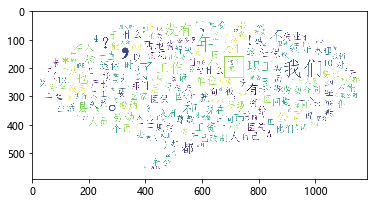

In [19]:
# 词云图绘制
from wordcloud import WordCloud
mask = plt.imread('基于文本内容的垃圾短信识别-数据&代码/duihuakuan.jpg')
wc = WordCloud(mask=mask,background_color='white',font_path='C:\\Windows\\Fonts\\simfang.ttf')
wc.fit_words(word_fre)
plt.imshow(wc)

In [15]:
# 获取训练样本的tf-idf权值向量
    # 拆分训练集和测试集
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer
from sklearn.model_selection import train_test_split
data_tr,data_te,labels_tr,labels_te = train_test_split(adata,labels,test_size=0.2)
data_tr,data_te,labels_tr,labels_te

(564     1 、 靠近 平湖 健身 广场 入口 及 门球 附近 两间 厕所 晚上 都 没有 灯 ， 请...
 5850    尊敬 厅长 ： 　 　 您好 ！ 因 工作 两地分居 ， 省内 不同 市州 ， 老公 基层 ...
 5424    尊敬 彭 厅长 ： 　 　 您好 。 红歌 红梅赞 ： 一片丹心 向阳 开 。 写 十五年 ...
 165     　 　 请问 领导 ： 毛唐 铺 中 安置 业 红线 内 居民区 何时能 通 天然气 ？ 天...
 6738    关于 I6 市南 大 中心 卫生院 2014 年 起 私自 停缴 14 名 职工 社保 基金...
                               ...                        
 1634    尊敬 领导 : M1 区 水洞 底镇 铁路 跨 线桥 交叉路口 ( 童 长岛 家 ) 201...
 1167    龙腾 大厦 业主 ， 自 2014 年 交房 后 所 面对 严重 与 购房 合同 不符 事实...
 5216    　 　 根据 长民发 { 2014 } 33 号 文件精神 ， 社区 专职 工作人员 从 2...
 6605    　 　 政府 大力 宣传 让 K3 县人 回乡 务工 ， 一起 建设 美好 家乡 。 但是 ...
 5713    尊敬 刘 主席 您好 ： 　 　 今年 78 岁 ， 1958 年 水电 八局 参加 工作 ...
 Name: message, Length: 799, dtype: object,
 5443    尊敬 刘 主席 ： 　 　 您好 　 　 一 、 万分 感谢您 等 对 我们 关心 。 　 ...
 612     　 　 你好 ！ 　 　 你好 ， 2016 年 已 过 ， 我们 E10 县 金石 镇山立...
 1838    现在 ， 新 人民 医院 已 被 大型 小区 包围 ， 该 区域 人口 非常 稠密 ， 约 ...
 1062    领导 ， 十分 感谢您 百忙之中 看到 求助 ， 同时 希望 得到 您 帮助 ， 我们 于 ...
 6003    尊敬 领导 ： 　 　 你好 ！ 百忙之中 打扰 一下 。 深表歉意 。   　 　 198...
            

In [15]:
countVectorizer = CountVectorizer()
data_tr = countVectorizer.fit_transform(data_tr)
X_tr = TfidfTransformer().fit_transform(data_tr.toarray()).toarray()
data_te = CountVectorizer(vocabulary=countVectorizer.vocabulary_).fit_transform(data_te)

In [16]:
# 创建模型
from sklearn.naive_bayes import GaussianNB #高斯朴素贝叶斯
X_te = TfidfTransformer().fit_transform(data_te.toarray()).toarray()
model = GaussianNB()
model.fit(X_tr,labels_tr)

model.score(X_te,labels_te)

0.6915520628683693

In [27]:
from sklearn.metrics import f1_score
f1_score(list(model.predict(X_te)), list(labels_te), average='macro')

0.5454877393248935